In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

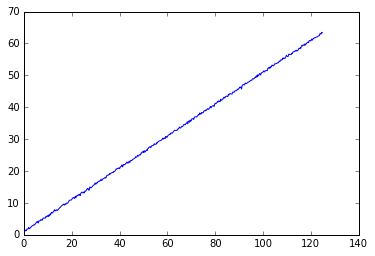

In [138]:
eps = np.random.normal(loc = 0, scale = 0.2, size = 500)
X = np.arange(0, 125, 0.25)
Y = [1 + 0.5*X[i] + eps[i] for i in range(0, len(X))]
data = np.array([[X[i], Y[i]] for i in range(0, len(X))])
plt.plot(data[:,0], data[:,1])

In [139]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [140]:
def Y_(x, k, b):
    return k*x + b

In [141]:
x = X
y = Y
args = minimize(lambda params: mean_squared_error(Y_(x, params[0], params[1]), y), [1,0]).x
print args

[ 0.49949204  1.03022252]


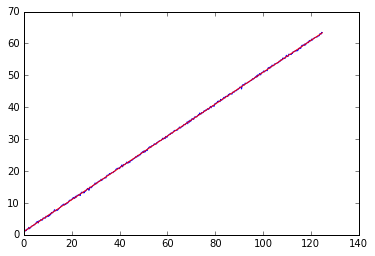

In [142]:
plt.plot(data[:,0], data[:,1])
Y = [args[0] * x + args[1] for x in X]
plt.plot(X, Y, c = 'r')

С добавлением выбросов:

In [143]:
eps = np.random.normal(loc = 0, scale = 0.2, size = 75)
Y_add = [-1 + e for e in eps]
X_add = np.sort(np.random.uniform(0, 125, size = 75))
data_add = np.array([[X_add[i], Y_add[i]] for i in range(0, len(X_add))])
#data = np.sort(np.vstack((data, data_add)), 0)

In [144]:
data1 = np.vstack((data, data_add))
data1 = list(data1)
data1 = np.array(sorted(data1, key = lambda x: x[0]))

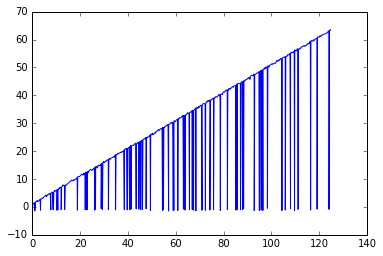

In [145]:
plt.plot(data1[:,0], data1[:,1])

# MSE:

In [146]:
x = data1[:,0]
y = data1[:,1]
args = minimize(lambda params: mean_squared_error(Y_(x, params[0], params[1]), y), [1,0]).x
print args

[ 0.45723409 -0.31841892]


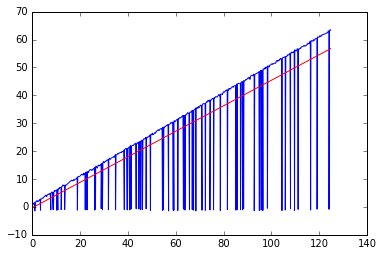

In [147]:
plt.plot(data1[:,0], data1[:,1])
X = data1[:,0]
Y = [args[0] * x + args[1] for x in X]
plt.plot(X, Y, c = 'r')

# MAE:

In [148]:
from sklearn.metrics import mean_absolute_error

In [149]:
x = data1[:,0]
y = data1[:,1]
args = minimize(lambda params: mean_absolute_error(Y_(x, params[0], params[1]), y), [1,0]).x
print args

[ 0.49933315  1.0031621 ]


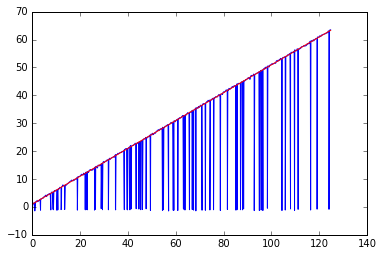

In [150]:
plt.plot(data1[:,0], data1[:,1])
X = data1[:,0]
Y = [args[0] * x + args[1] for x in X]
plt.plot(X, Y, c = 'r')

Как можем видеть из графиков, модель, минимизирующая MAE более устойчива к выбросам, чем минимизирующая MSE, так как как прямая, полученная при оптимизации MAE более точно отвечает реальной зависимости.